# Analysis of the Medical Cost Personal Data

Author: Shucheng Fei

Course Project, UC Irvine, Math 10, S23

## Introduction

Medical charges are the fees incurred for health services, procedures, or medications, which can vary widely based on numerous factors such as procedures performed, complexity of care required, and location. In my project, I aim to delve into these complexities by investigating the relationships between medical charges and various influential factors like gender, body mass index (BMI), smoking habits, and geographic regions. By doing so, I hope to uncover significant insights and patterns that might help to explain the variability in medical charges, thereby providing a more comprehensive understanding of how these elements interplay in determining health costs. This exploration could lead to strategies for cost management and improved predictability in the healthcare sector

## Main portion of the project



## Section 1: Overview and Clean Dataset

First, I will import the necessary packages required for this project and analysis. Next, I will load the dataset and present some basic details about it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

**Reference**:This dataset contains age, sex, bmi, the number of children, if smoking, region and medical charges, a total of 7 columns. It is a dataset from Kaggle, and also can be found on github through this link: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [2]:
#load the dataset
df=pd.read_csv("insurance.csv")

#get the first N rows of a DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Visualization

**Reference**:Vega-Altair: Declarative Visualization in Python link: https://altair-viz.github.io/

1. Visualization using Altair

In [3]:
# create a dataframe with the sum of charges by region
charges_df = df.groupby('region')['charges'].sum().reset_index()

# sort the data
charges_df = charges_df.sort_values('charges', ascending=True)

# take the top 5 entries
charges_df = charges_df.head(5)

#plot the data as bar charts
chart = alt.Chart(charges_df).mark_bar().encode(
    x='charges',
    y=alt.Y('region', sort='-x'),
    color=alt.Color('region', scale=alt.Scale(scheme='blues'))
)

chart


alt.Chart(...)

Here, I plot the data as bar charts using Altair. The X-axis is the sum of charges, and the y-axis is the region. From the chart, we can tell that the:

 charges in the southeast>the charges in the northeast>the charges in the northwest>the charges in the southwest. 

The visualization chart can easily help us tell the relationship between the charges and the regions.

2. Visualization using Seaborn

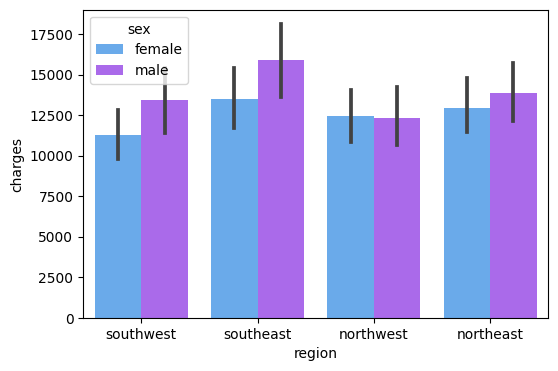

In [4]:
#generating a bar plot using seaborn's barplot function 
#to visualize 'charges' per 'region'separated by 'sex'
f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

Here, I plot the data as bar charts using Seaborn. The X-axis is the region, and the y-axis is the charges, the legend is sex. From the chart, we can tell that the:

The medical cost of males is greater than the medical cost of females in the southwest, southeast, and northeast area, except for the northwest area. 

The visualization chart can easily help us tell the relationship between the charges and the genders in each region.

3. Visualization using Seaborn

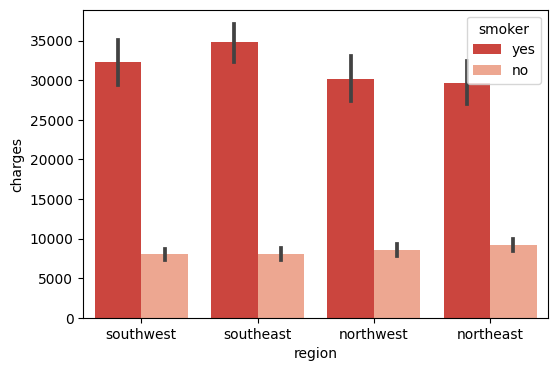

In [5]:
#creates a figure with one subplot of size 6x4.
f, ax = plt.subplots(1,1, figsize=(6,4))
#generates a bar plot from the 'df' DataFrame, distinguishing 'smoker' and 'non-smoker' data points in different colors.
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

Here, I plot the data as bar charts using Seaborn. The X-axis is the region, and the y-axis is the charges, the legend is the smoker. From the chart, we can tell that the:

The medical cost of smokers is much greater than the medical cost of non-smokers in all regions.

The visualization chart can easily help us tell the relationship between the charges and if smoking in each region.

4. Visualization using Seaborn

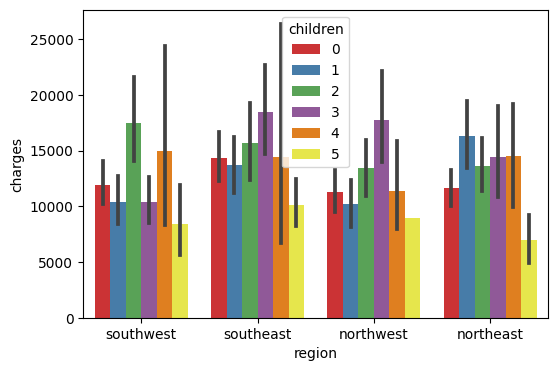

In [6]:
#creates a figure with one subplot of size 6x4.
f, ax = plt.subplots(1, 1, figsize=(6, 4))
#the x-axis represents different 'regions', the y-axis represents 'charges', and the color ('hue') of the bars differentiates the number of 'children'
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')



Here, I plot the data as bar charts using Seaborn. The X-axis is the region, and the y-axis is the charges, and the legend is the number of children. The visualization chart can easily help us tell the relationship between the charges and the number of children in each region.

In [7]:
#Get the dimension of the dataset
df.shape

(1338, 7)

In [8]:
#Counting numbers of missing values in each column
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#get a summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To convert the categorical values to numerical values, I use the replace method to give one as 1, and the other one as 0.

## Section 2: Data Analysis

### 2.1 Logistic Regression

I'm interested in predicting whether the patient is smoking by his/her age and his/her medical charges.

Logistic regression is a type of regression analysis used when the target variable is categorical, typically for binary classification problems.

In [10]:
#Make a sub-dataframe that only contains the necessary input that we want to predict
sub_cols=["age", "charges"]

In [11]:
#make the new column that returns "True" if the patient is a smoker
df["smoking"]=(df["smoker"]=="yes")

In [12]:
#making a train_test_split will help us to make better and accurate prediction
X_train, X_test, y_train, y_test=train_test_split(df[sub_cols], df["smoking"], test_size=0.5, random_state=0)

In [13]:
#creates an instance of the LogisticRegression class from the sklearn library
clf=LogisticRegression()

In [14]:
#fits the logistic regression model to the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
#sums up the total number of correct predictions, and returns this count
(clf.predict(X_test)==y_test).sum()

605

In [16]:
#return the accuracy of the model on the test data
(clf.predict(X_test)==y_test).sum()/len(X_test)

0.9043348281016442

In [17]:
#make sure that we get the right coefficient by specifing the index
clf.coef_
Age_coef,Charges_coef=clf.coef_[0]
Charges_coef

0.00028983082897240855

From the coefficient that we get above, we can tell that there may be little relation between the smoking status and the patient's age and medical charges. So there is no definite underlying impact between these elements.

When the age is 33, and the medical charges are 24000, what will our model predict?

In [18]:
sigmoid=lambda x:1/(1+np.exp(-x))
age=33
charges=24000
sigmoid(Age_coef*age+Charges_coef*charges+clf.intercept_)

array([0.79253355])

We can tell that if the patient is 33 years old and the medical charge is 24000, there is a 79.3% probability that he/she is a smoker.

In [19]:
#double check with predict_proba
clf.predict_proba([[age,charges]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.20746645, 0.79253355]])

It corresponds to the result that we get above, there is a 20% probability that the patient is a non-smoker and an 80% probability that the patient is a smoker.

### Processing the Data Again

replaces the categorical values in the 'sex' and 'smoker' columns of the DataFrame 'df' with numerical representations

In [20]:
#replaces the categorical values in the 'sex' and 'smoker' columns of the DataFrame 'df' with numerical representations
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker']=df['smoker'].replace({'yes': 1, 'no': 0})

In [21]:
#return the first five rows of the DataFrame 
df.head()

,age,sex,bmi,children,smoker,region,charges,smoking
0,19,0,27.900,0,1,southwest,16884.92400,True
1,18,1,33.770,1,0,southeast,1725.55230,False
2,28,1,33.000,3,0,southeast,4449.46200,False
3,33,1,22.705,0,0,northwest,21984.47061,False
4,32,1,28.880,0,0,northwest,3866.85520,False


In [22]:
# generate descriptive statistics of the DataFrame 'df'
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


### 2.2 Correlation Analysis

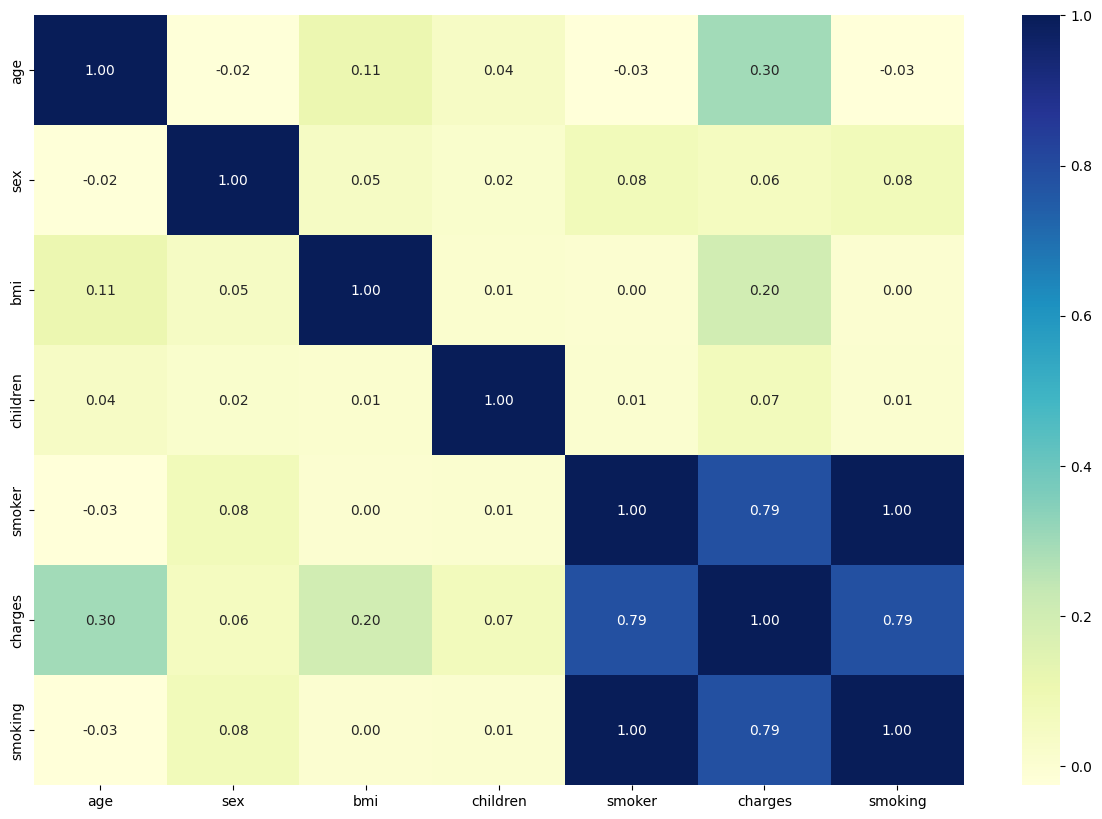

In [23]:
#heatmap of the correlations between different numerical columns in the DataFrame 'df'
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

Based on the correlation matrix, we can easily tell the correlation coefficient between each different value. It's not surprising to find that all other values(age, sex, BMI, children, if smoking) has positive coefficients towards our target value(charges), which means a positive relationship between the factors and the result of charges.

Smoking is the biggest factor for the medical charges while gender serves as the smallest factor for the medical charges.

In [24]:
#a series that shows how strongly each feature in 'df' is correlated with 'charges', from least to most correlated
df.corr()['charges'].sort_values()

sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
smoking     0.787251
charges     1.000000
Name: charges, dtype: float64

The chart also corresponds to the list here. The affecting impact is in order as sex<number of children<bmi<age<if smoking.

### Confusion Matrix

In [25]:
df["pred"] = clf.predict(df[sub_cols])

In [26]:
alt.data_transformers.enable('default', max_rows = 45000)
df3 = df[["smoking","pred"]]

c1 = alt.Chart(df3).mark_rect().encode(
    x = "smoking:N",
    y = "pred:N",
    color = alt.Color("count()", scale = alt.Scale(scheme="spectral",))
)

c2 = alt.Chart(df3).mark_text(color="white").encode(
    x = "smoking:N",
    y = "pred:N",
    text="count()"
)

(c1+c2).properties(
    height=400,
    width = 400
)

alt.LayerChart(...)

The confusion matrix is a specific table layout that allows visualization of the performance of a machine learning algorithm, typically a supervised learning one. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class

### 2.3 Linear Regression

In [27]:
#since region is not a numerical value, I just adopt the numerical values as the multiple features
cols=["age", "sex", "bmi", "children", "smoker"]

In [28]:
#Because our original dataset has a large sample size, making a train_test_split to divide dataset would make better and more accurate prediction
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["charges"], test_size = 0.5, random_state=0)

In [29]:
#creates an instance of the LinearRegression model
reg=LinearRegression()

In [30]:
#trains the Linear Regression model reg on the training dataset
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
#using the trained Linear Regression model reg to make predictions on the DataFrame df
df["pred"]=reg.predict(df[cols])

In [32]:
#return the first five rows of the DataFrame 
df.head()

,age,sex,bmi,children,smoker,region,charges,smoking,pred
0,19,0,27.900,0,1,southwest,16884.92400,True,25171.964001
1,18,1,33.770,1,0,southeast,1725.55230,False,3827.952870
2,28,1,33.000,3,0,southeast,4449.46200,False,7183.093997
3,33,1,22.705,0,0,northwest,21984.47061,False,3282.900343
4,32,1,28.880,0,0,northwest,3866.85520,False,5182.620514


In [33]:
#baseline value for the prediction when all features are absent or zero
reg.intercept_

-12821.333696974298

In [34]:
#returns the coefficients of the independent variables in the linear regression
reg.coef_

array([  256.53810649,  -289.91929237,   349.1916238 ,   529.31880647,
       23376.62737069])

The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later. By comparison, we can easily tell that smoking has the biggest effect on medical charges. And it's surprising to find that the coefficient of sex is negative, but it is so small compared to the coefficient of smoking, so we can ignore it.

In [35]:
#gives the accuracy of the model
reg.score(X_test, y_test)

0.7656836303421459

The accuracy of the model is not bad.

In [36]:
#creates an instance of the LinearRegression model
reg1=LinearRegression()

In [37]:
#trains the Linear Regression model reg on the training dataset
reg1.fit(df[["bmi"]], df["charges"])

LinearRegression()

In [38]:
#using the trained Linear Regression model reg to make predictions on the DataFrame df
df["pred1"]=reg1.predict(df[["bmi"]])

**Reference**: Plotting graph using altair user guide
https://altair-viz.github.io/user_guide/interactions.html

In [39]:
#visualize the prediction
c = alt.Chart(df).mark_circle().encode(
    x=alt.X("bmi", scale=alt.Scale(zero=False)),
    y=alt.Y("charges", scale=alt.Scale(zero=False)),
    color="age"
)

c1 = alt.Chart(df).mark_line(color="red").encode(
    x=alt.X("bmi", scale=alt.Scale(zero=False)),
    y="pred1"
)

c + c1

alt.LayerChart(...)

By the graph above, we can easily confirm that there is a positive trend between the BMI and the patient's medical charges.

### 2.4 Lasso Regression

**Reference**: Understanding more about the usage of Lasso Regression
https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/#:~:text=Lasso%20regression%20is%20a%20regularization,i.e.%20models%20with%20fewer%20parameters).

Here I try to use the Lasso Regression model to fit the data. 

While linear regression will use all variables presented to it in the prediction, Lasso has the ability to make some of the coefficients zero and therefore it can exclude those variables from the model. This is why Lasso is often preferred when we have a large number of features and we need to identify the most important ones.

In [40]:
#Imports the Lasso regression model from sklearn's linear_model module.
from sklearn.linear_model import Lasso
#Initializes a Lasso regression model with specified parameters
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

#Trains the Lasso model on the given training data
Lasso.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Lasso(alpha=0.2, normalize=False)

In [41]:
#Prints the y-intercept of the trained Lasso model
Lasso.intercept_

-12820.971126011134

In [42]:
#Prints the coefficients of the independent variables in the trained Lasso model
Lasso.coef_

array([  256.53791261,  -289.05747452,   349.17914798,   529.18863562,
       23375.36254796])

In [43]:
#Prints the R^2 score for the model's performance on the test data.
Lasso.score(X_test, y_test)

0.7656826872029137

The result that I get using the Lasso Model is similar to the Linear Model. And the accuracy score is also similar.

### 2.5 Random Forest Regressor

In [44]:
#Initializes a RandomForestRegressor model with specified parameters
rfr=RandomForestRegressor(n_estimators=200, criterion='mse', random_state=1, n_jobs=-1)

In [45]:
#Trains the Random Forest model on the given training data
rfr.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=200, n_jobs=-1,
                      random_state=1)

In [46]:
#Predicts the target variable for the training data using the trained model
X_train_pred=rfr.predict(X_train)
#Predicts the target variable for the test data using the trained model
X_test_pred=rfr.predict(X_test)

In [47]:
#Prints the Mean Squared Error (MSE) for both the train and test data predictions.
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (mean_squared_error(X_train_pred, y_train),
       mean_squared_error(X_test_pred, y_test)))
#Prints the Mean Absolute Error (MAE) for both the train and test data predictions.
print('MAE train data: %.3f, MAE test data: %.3f' % 
      (mean_absolute_error(X_train_pred, y_train),
       mean_absolute_error(X_test_pred, y_test)))

MSE train data: 3869996.051, MSE test data: 24341035.296
MAE train data: 1104.552, MAE test data: 2880.159


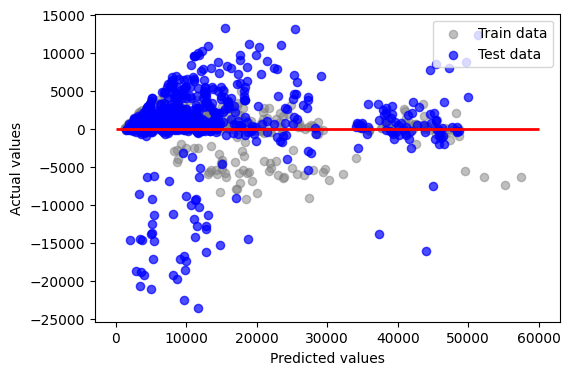

In [48]:
#Creates a new figure with a defined size
plt.figure(figsize=(6,4))
#Plots residuals of training data
plt.scatter(X_train_pred, X_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
#Plots residuals of test data.
plt.scatter(X_test_pred, X_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
#Labels the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
#Places a legend in the upper right corner.
plt.legend(loc = 'upper right')
#draws a horizontal red line at y=0.
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

This code is used to visualize the residuals (the differences between actual and predicted values) of a model's predictions for both training and test datasets. The scatter plot helps in diagnosing the performance of the model: points scattered around the line y=0 indicate better model fit, while any pattern or 'shape' to the points indicates the model is failing to capture some aspect of the data's structure.

Feature importance is that they provide insights into the relative importance of different features in a machine learning model, helping to identify which features have the most impact on the model's predictions or outcomes. This information can be used for feature selection, understanding the underlying relationships in the data, and improving the model's performance by focusing on the most influential features.

In [49]:
#creates a Pandas Series object from the feature importances of a Random Forest Regressor, with the feature names as the index, and then sorts the values in descending order
pd.Series(rfr.feature_importances_, index=rfr.feature_names_in_).sort_values(ascending=False)

smoker      0.592614
bmi         0.236881
age         0.139158
children    0.023757
sex         0.007590
dtype: float64

In [50]:
#create a dataframe
feature_importances_df = pd.DataFrame({
    'feature': rfr.feature_names_in_,
    'importance': rfr.feature_importances_
})

print(feature_importances_df)

    feature  importance
0       age    0.139158
1       sex    0.007590
2       bmi    0.236881
3  children    0.023757
4    smoker    0.592614


In [51]:
#visualize the stats by barcharts using altair
chart = alt.Chart(feature_importances_df).mark_bar().encode(
    x='importance',
    y='feature',
    tooltip=['importance','feature']
).properties(
    title='Feature Importances'
)
chart

alt.Chart(...)

According to the chart above, I can tell the most important feature is smoking and the least important one is sex, and I can rank them by importance in descending order: smoker>bmi>age>children>sex.

### 2.6 Polynomial Regression

In [52]:
df["b2"]=df["bmi"]**2
df["b3"]=df["bmi"]**3
poly_cols=["bmi","b2","b3"]
reg2=LinearRegression()
reg2.fit(df[poly_cols], df["charges"])
df["poly_pred"]=reg2.predict(df[poly_cols])

In [53]:
#visualize the prediction
c = alt.Chart(df).mark_circle().encode(
    x=alt.X("bmi", scale=alt.Scale(zero=False)),
    y=alt.Y("charges", scale=alt.Scale(zero=False)),
    color="age"
)

c1 = alt.Chart(df).mark_line(color="black").encode(
    x=alt.X("bmi", scale=alt.Scale(zero=False)),
    y="poly_pred"
)

c + c1

alt.LayerChart(...)

Using polynomial regression to check, we can see the line which is not strictly positive or negative, but it's mostly positive.

In [54]:
#creates an instance of the PolynomialFeatures class with degree 2
poly=PolynomialFeatures(degree=2)

In [55]:
#transforming the selected columns of the dataframe into a new set of features
cols_poly=poly.fit_transform(df[cols])

In [56]:
#splits the polynomial features and target into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(cols_poly, df["charges"], test_size=0.5, random_state=0)

In [57]:
Poly_reg=model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [58]:
# fits the linear regression model to the training data
Poly_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [59]:
#uses the fitted model to predict the target values for the training data
y_train_pred=Poly_reg.predict(X_train)

In [60]:
#uses the fitted model to predict the target values for the test data
y_test_pred=Poly_reg.predict(X_test)

In [61]:
#represents the proportion of the variance in the target variable that is predictable from the features in the test set
Poly_reg.score(X_test, y_test)

0.8114317511190225

In [62]:
#the average of the absolute differences between the predicted and actual values in the test set
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
#the average of the squared differences between the predicted and actual values in the test set
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
#the square root of the MSE, providing a measure of the average error in the same units as the original target variable
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3120.634787941234
Mean Squared Error: 27863588.57414549
Root Mean Squared Error: 5278.597216509846


In [63]:
##Predicting the charges
y_test_pred = Poly_reg.predict(X_test)

In [64]:
##Comparing the actual output values with the predicted values
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df3

,Actual,Predicted
578,9724.53000,12152.694606
610,8547.69130,9551.723391
569,45702.02235,47446.240244
1034,12950.07120,13128.307165
198,9644.25250,10791.304176
...,...,...
961,3353.28400,5567.818043
1218,41661.60200,43248.889594
490,1748.77400,4200.669699
596,7640.30920,8514.777042


From the chart that we get above, we can easily tell that our prediction is mostly close to the actual values, despite there being still some variations.

### 2.7 KNeighborsRegressor

**Reference**:sklearn.neighbors.KNeighborsRegressor guide 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html 

The KNeighborsRegressor, as part of the K-Nearest Neighbors (KNN) algorithm, is a type of instance-based learning that is often used for its simplicity and the fact that it makes no assumptions about the underlying data distribution. The main advantage of KNeighborsRegressor is that it can capture complex patterns in the data by considering a specified number ('k') of nearest data points in the feature space when making predictions, making it particularly useful for datasets where the relationship between features may not be linear or easily defined.

In [65]:
#imports the KNeighborsRegressor class and splits the selected features and 'charges' target of the dataframe into training and testing sets with a 50% split
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['charges'], test_size=0.5, random_state=0)

In [66]:
#creates an instance of the KNeighborsRegressor class from the sklearn library with the number of neighbors set to 7
knn = KNeighborsRegressor(n_neighbors=7)

In [67]:
#fits the K-Nearest Neighbors regression model to the training data, learning from the 'X_train' feature data to predict the 'y_train' target data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [68]:
#predict the target values for the test data and stores the predictions in the 'y_test_pred' variable.#
y_test_pred = knn.predict(X_test)

In [69]:
#calculates and returns the coefficient of determination R^2 of the prediction
knn.score(X_test, y_test)

0.15739782889487908

Not a relatively high score, refers to that it is not a proper model for the data.

### 2.8 Ridge Regression

**Reference**:sklearn.linear_model.Ridge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 

The purpose of the below code is to fit a Ridge regression model, which is a linear regression model that uses L2 regularization to prevent overfitting, to a training dataset. The fitted model is then evaluated on a test dataset by examining the model's coefficients, intercept, and R-squared value, which can give insights into its predictive performance.

In [70]:
#imports the Ridge regression class from the linear_model module
from sklearn.linear_model import Ridge

In [71]:
#creates an instance of the Ridge regression class with a regularization strength (alpha) of 0.5
Ridge = Ridge(alpha=0.5)

In [72]:
#fits the Ridge regression model to the training data
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [73]:
#prints the y-intercept of the fitted Ridge regression model
Ridge.intercept_

-12788.900259951542

In [74]:
#prints the coefficients of the features in the fitted Ridge regression model
Ridge.coef_

array([  256.41790634,  -284.32696862,   348.91921624,   529.38371107,
       23271.34693535])

In [75]:
#indicating the proportion of variance in the target variable that can be explained by the model
Ridge.score(X_test, y_test)

0.7654749639260754

From the score that we finally get, we can tell that the accuracy of the model is good.

## Section 3: Data Science Salaries 2023

I'm just interested in this one so I start a new one.

**Reference**: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
A Data Science Job Salaries Dataset from Kaggle contains 11 columns, each are:

work_year: The year the salary was paid.
experience_level: The experience level in the job during the year
employment_type: The type of employment for the role
job_title: The role worked in during the year.
salary: The total gross salary amount paid.
salary_currency: The currency of the salary paid as an ISO 4217 currency code.
salaryinusd: The salary in USD
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio: The overall amount of work done remotely
company_location: The country of the employer's main office or contracting branch
company_size: The median number of people that worked for the company during the year

In [76]:
df2=pd.read_csv("ds_salaries.csv")

In [77]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [78]:
#To see where there is null value in the chart
df2.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [79]:
#visualization using plotly
import plotly.express as px

In [80]:
#rename to make it more detailed
df2['experience_level'] = df2['experience_level'].replace({'EN':'Entry-level/Junior'})
df2['experience_level'] = df2['experience_level'].replace({'MI':'Mid-level/Intermediate'})
df2['experience_level'] = df2['experience_level'].replace({'SE':'Senior-level/Expert'})
df2['experience_level'] = df2['experience_level'].replace({'EX':'Executive-level/Director'})

### 3.1 Visualization

Visualization using Plotly

**Reference**:https://www.geeksforgeeks.org/using-plotly-for-interactive-data-visualization-in-python/

In [81]:
ex_level = df2['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path = [ex_level.index], 
                 values = ex_level.values, 
                 title = 'Experience Level')
fig.show()

1.From the chart above, we can tell most of the data science industry people are expert, with very little few as Director.

In [82]:
top15_job_titles = df2['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, 
             x = top15_job_titles.index, 
            text = top15_job_titles.values, 
            title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

2.From the chart above, we can tell that most of the people in industry are Data Engineer, and the least few people are Dara Analytics Manager.

### 3.2 Decision Tree Classification

Next, I will use Machine Learning: Decision Tree Classfier in order to use "salary_in_usd","remote_ratio", "work_year" to predict their experience level.

In [83]:
# Import
from sklearn.tree import DecisionTreeClassifier

In [84]:
input = ["salary_in_usd","remote_ratio", "work_year"]
X =df2[input]
y = df2["experience_level"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=100)

In [86]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)

In [87]:
clf.fit(X_train, y_train) # Fit the classifier to the training data using X for the input features and using "job_title" for the target.

DecisionTreeClassifier(max_leaf_nodes=10)

In [88]:
DecisionTreeClassifier(max_leaf_nodes=10)

DecisionTreeClassifier(max_leaf_nodes=10)

In [89]:
clf.score(X_train, y_train)

0.70378263185935

In [90]:
clf.score(X_test, y_test)

0.6922257720979765

In [91]:
# Illustrate the resulting tree using matplotlib. 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

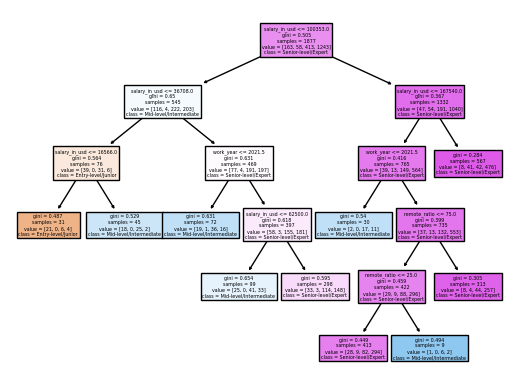

In [92]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

In [93]:
clf.feature_importances_

array([0.86495254, 0.04943533, 0.08561213])

In [94]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)

salary_in_usd    0.864953
remote_ratio     0.049435
work_year        0.085612
dtype: float64

In [95]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)

salary_in_usd    0.864953
remote_ratio     0.049435
work_year        0.085612
dtype: float64

Feature importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model’s prediction. The feature_importance for salary_in_usd, remote_ratio, work_year are: 0.86, 0.049, and 0.085. Thus, we can know that “salary_in_usd” is the most important feature to predict our model’s prediction.

### 3.3 K-nearest Neighbor Classification

In [96]:
#Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss

In [97]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
loss_train=log_loss(y_train, clf.predict_proba(X_train))
loss_test=log_loss(y_test,clf.predict_proba(X_test))

In [98]:
loss_train

0.7893610377063175

The log loss for x_train and y_train is about 0.789.

In [99]:
loss_test

3.776038294274332

The log loss for x_test and y_test is about 3.776.

Therefore, we can see that loss_test is larger than loss_train, indicating a sign of over-fitting.

## Summary

My project harnesses an array of regression analysis methods, such as linear, logistic, and ridge regression, to dissect complex data. These techniques are applied to explore the relationships between factors like age, body mass index (BMI), sex, the number of children, smoking habits, and geographical regions in relation to medical charges. By analyzing these diverse variables, we can gain a more comprehensive understanding of the data. The project’s conclusion identifies smoking as the most impactful factor on medical charges out of all the factors considered. The coefficient corresponding to smoking is positive, indicating that an increase in smoking habits leads to a rise in medical charges. This suggests that smokers typically incur higher medical expenses than non-smokers, stressing the economic implications of smoking on healthcare costs.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://www.kaggle.com/datasets/mirichoi0218/insurance

 https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

* List any other references that you found helpful.

https://altair-viz.github.io/

https://altair-viz.github.io/user_guide/interactions.html

https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/#:~:text=Lasso%20regression%20is%20a%20regularization,i.e.%20models%20with%20fewer%20parameters).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://www.geeksforgeeks.org/using-plotly-for-interactive-data-visualization-in-python/

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45ca373a-552b-4b25-a203-5b744f6cf5a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>